Mounted at /content/drive
1/1 [==============================] - 1s 857ms/step
Training Bernoulli Naive Bayes for EfficientNetB5...
Performance metrics for Bernoulli Naive Bayes with EfficientNetB5:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       105
           2       1.00      1.00      1.00       105
           3       1.00      1.00      1.00       105
           4       1.00      1.00      1.00       105

    accuracy                           1.00       525
   macro avg       1.00      1.00      1.00       525
weighted avg       1.00      1.00      1.00       525

Accuracy: 1.0
Sensitivity: 1.0
Precision: 1.0
F1 Score: 1.0



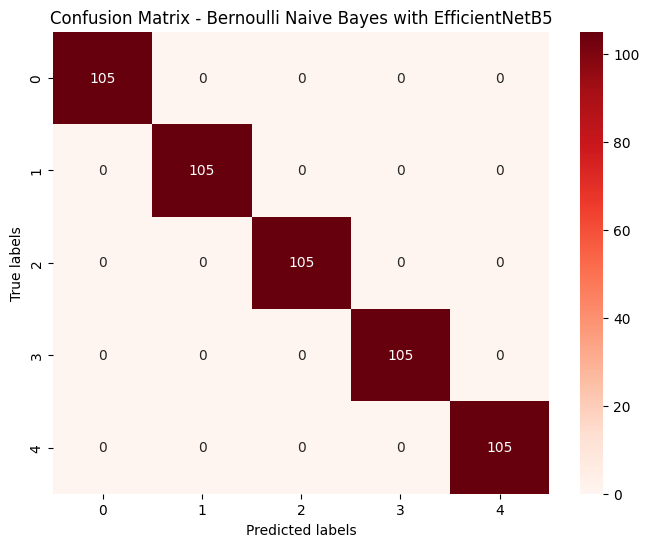

Training Multinomial Naive Bayes for EfficientNetB5...
Performance metrics for Multinomial Naive Bayes with EfficientNetB5:
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.32      0.44       105
           1       0.29      0.57      0.38       105
           2       0.63      0.11      0.19       105
           3       0.46      0.29      0.35       105
           4       0.32      0.56      0.41       105

    accuracy                           0.37       525
   macro avg       0.48      0.37      0.36       525
weighted avg       0.48      0.37      0.36       525

Accuracy: 0.37142857142857144
Sensitivity: 0.3714285714285714
Precision: 0.48191387990784024
F1 Score: 0.35632172223728203



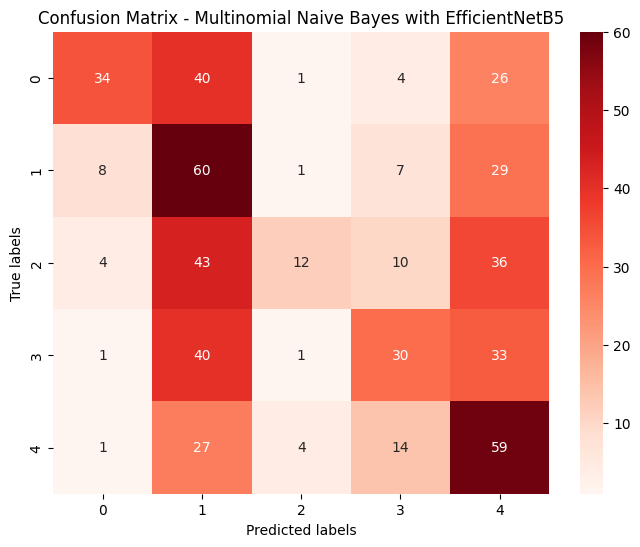

Training Complement Naive Bayes for EfficientNetB5...
Performance metrics for Complement Naive Bayes with EfficientNetB5:
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.24      0.36       105
           1       0.28      0.57      0.37       105
           2       0.33      0.01      0.02       105
           3       0.42      0.27      0.33       105
           4       0.30      0.59      0.40       105

    accuracy                           0.34       525
   macro avg       0.41      0.34      0.30       525
weighted avg       0.41      0.34      0.30       525

Accuracy: 0.3352380952380952
Sensitivity: 0.3352380952380952
Precision: 0.4104156548058987
F1 Score: 0.2953957062958539



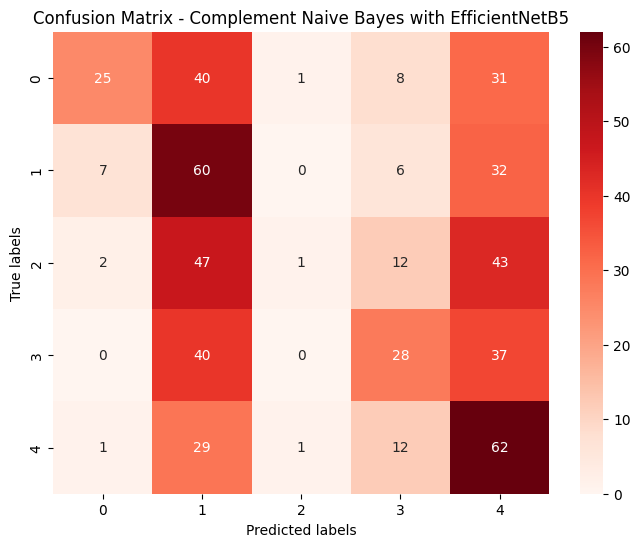

Training Gaussian Naive Bayes for EfficientNetB5...
Performance metrics for Gaussian Naive Bayes with EfficientNetB5:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.61      0.73       105
           1       0.48      0.98      0.65       105
           2       0.85      0.65      0.74       105
           3       0.88      0.66      0.75       105
           4       0.98      0.77      0.86       105

    accuracy                           0.73       525
   macro avg       0.82      0.73      0.75       525
weighted avg       0.82      0.73      0.75       525

Accuracy: 0.7333333333333333
Sensitivity: 0.7333333333333333
Precision: 0.8190991049789623
F1 Score: 0.7452014185723079



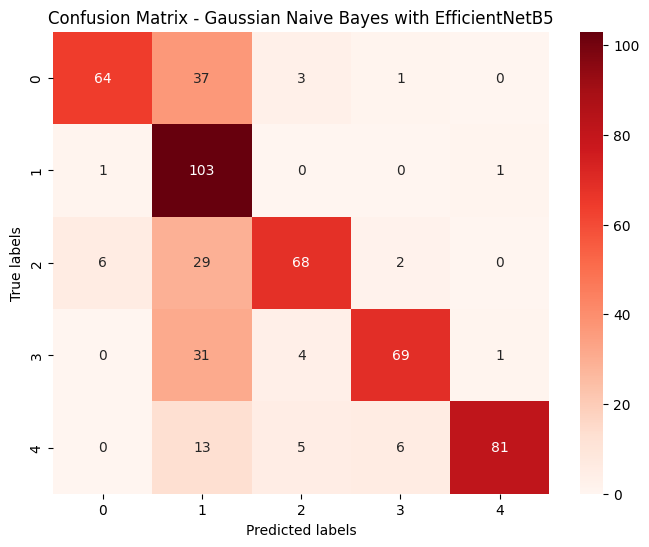

In [1]:
# Import necessary libraries
import os
import numpy as np
from keras.applications import EfficientNetB5
from keras.applications.efficientnet import preprocess_input
from keras.preprocessing import image
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/A/DR_700/Train'
test_dir = '/content/drive/MyDrive/A/DR_700/Test'

# EfficientNetB5
model_b5 = EfficientNetB5(weights='imagenet', include_top=False)

# Function to extract features from an image using EfficientNetB5
def extract_features_efficientnet_b5(img_path):
    img = image.load_img(img_path, target_size=(456, 456))  # Adjusted target size for EfficientNetB5
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model_b5.predict(img_data)
    return features

# Load images and extract features for B5
x_train_b5, y_train_b5 = [], []
x_test_b5, y_test_b5 = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_efficientnet_b5(os.path.join(class_dir, img_path))
        x_train_b5.append(features)
        y_train_b5.append(i)

# Load images and extract features for B5
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_efficientnet_b5(os.path.join(class_dir, img_path))
        x_test_b5.append(features)
        y_test_b5.append(i)

# Flatten the features for B5
x_train_flat_b5 = np.array([feature.flatten() for feature in x_train_b5])
x_test_flat_b5 = np.array([feature.flatten() for feature in x_test_b5])

# Scale the input features to the range [0, 1] for B5
scaler_b5 = MinMaxScaler()
x_train_scaled_b5 = scaler_b5.fit_transform(x_train_flat_b5)
x_test_scaled_b5 = scaler_b5.transform(x_test_flat_b5)

# Ensure non-negative values for B5
min_value_b5 = np.min(np.concatenate([x_train_scaled_b5, x_test_scaled_b5]))
x_train_scaled_non_negative_b5 = x_train_scaled_b5 - min_value_b5
x_test_scaled_non_negative_b5 = x_test_scaled_b5 - min_value_b5

# List of classifiers to try
classifiers = {
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Gaussian Naive Bayes": GaussianNB()
}

# Train classifiers for B5
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name} for EfficientNetB5...")
    # Train classifier
    clf.fit(x_train_scaled_non_negative_b5, y_train_b5)
    # Predict on test set
    y_pred_b5 = clf.predict(x_test_scaled_non_negative_b5)
    # Print performance metrics for B5
    print(f'Performance metrics for {clf_name} with EfficientNetB5:')
    print('Classification Report:')
    print(classification_report(y_test_b5, y_pred_b5))
    # Additional performance metrics
    accuracy_b5 = metrics.accuracy_score(y_test_b5, y_pred_b5)
    sensitivity_b5 = metrics.recall_score(y_test_b5, y_pred_b5, average='macro')
    precision_b5 = metrics.precision_score(y_test_b5, y_pred_b5, average='macro')
    f1_b5 = metrics.f1_score(y_test_b5, y_pred_b5, average='macro')
    print(f'Accuracy: {accuracy_b5}')
    print(f'Sensitivity: {sensitivity_b5}')
    print(f'Precision: {precision_b5}')
    print(f'F1 Score: {f1_b5}\n')
    # Plot confusion matrix
    cm_b5 = confusion_matrix(y_test_b5, y_pred_b5)
    # Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_b5, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
    plt.title(f'Confusion Matrix - {clf_name} with EfficientNetB5')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
